# **8. Algoritmo de Bernstein-Vazirani**

# **Dive in Learning**

# ***Diplomado en Computación y Programación Cuántica***

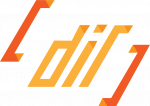

In [ ]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.1/125.1 kB 8.6 MB/s eta 0:00:00


In [ ]:
!pip install qiskit[visualization]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=95f48fc89f039439f06cd57525b429ce3f388fb7436af24f16a67764eaa370e1
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [ ]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 47.2 MB/s eta 0:00:00


In [ ]:
!pip install qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.2/366.2 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 11.1 MB/s eta 0:00:00


# **Algoritmo de Bernstein – Vazirani**

El **algoritmo de Bernstein–Vazirani**, introducido por primera vez por Ethan Bernstein y Umesh Vazirani en 1997. Este algoritmo puede verse como una extensión del algoritmo de Deutsch-Jozsa que cubrimos anteriormente. Demuestra que puede haber ventajas en el uso de una computadora cuántica como herramienta computacional para problemas más complejos que el problema de Deutsch-Jozsa.

$\textbf{El problema}$

Nuevamente se proporciona una función de caja negra $f$, que toma como entrada una cadena de bits ($x$) y devuelve $0$ o $1$, es decir:

$$f(\{x_0,x_1,x_2,...\}) \rightarrow 0 \textrm{ o } 1 \textrm{ donde } x_n \textrm{ es }0 \textrm{ o } 1 $$

En lugar de que la función sea balanceada o constante como en el problema de Deutsch-Jozsa, ahora se garantiza que la función devolverá el producto bit a bit de la entrada con alguna cadena, $s$. En otras palabras, dada una entrada $x$, $f(x) = s \cdot x \, \text{(mod 2)}$. Se espera que encontremos $s$. Como circuito reversible clásico, el oráculo de Bernstein-Vazirani se ve así:

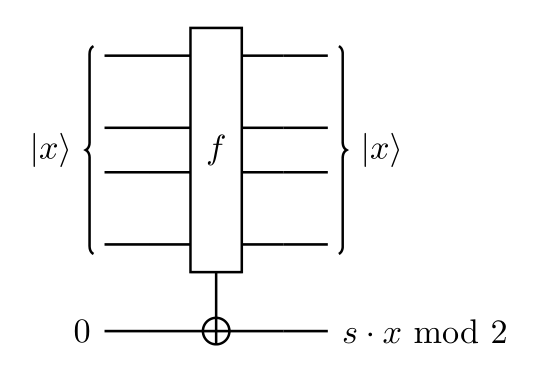

$\textbf{Solución clásica}$

Clásicamente, el oráculo devuelve:

$$f_s(x) = s \cdot x \mod 2$$

dada una entrada $x$. Por lo tanto, la cadena de bits oculta $s$ puede revelarse consultando al oráculo con la secuencia de entradas:

|Entrada(x)|
|:-----:|
|100...0|
|010...0|
|001...0|
|000...1|

Donde cada consulta revela un bit diferente de $s$ (el bit $s_i$). Por ejemplo, con `x = 1000...0` se puede obtener el bit menos significativo de $s$, con `x = 0100...0` podemos encontrar el siguiente bit menos significativo, y así sucesivamente. Esto significa que necesitaríamos llamar a la función $f_s(x)$, $n$ veces.

$\textbf{Ejemplo:}$

Veamos un ejemplo específico para $n=2$ qubits y una cadena secreta $s=11$

$$f_{s}(x)=(s_{0}x_{0}+s_{1}x_{1}) \mod 2.$$

Dado que $s=11$, tenemos

$$s_{0}=1,\qquad s_{1}=1.$$

Ahora evaluamos para todas las posibles entradas de $x$

|$x_{0}x_{1}$||$s_{0}x_{0}+s_{1}x_{1}$||$f_{s}(x)$|
|:-----:||:-----:||:-----:|
|$00$||$(1⋅0+1⋅0) \mod 2$||$0$|
|$01$||$(1⋅0+1⋅1) \mod 2$||$1$|
|$10$||$(1⋅1+1⋅0) \mod 2$||$1$|
|$11$||$(1⋅1+1⋅1) \mod 2$||$0$|

**Interpretación:**

La función

$$f_{s}(x)=s\cdot x \mod 2=\left(\sum_{i=0}^{n-1}s_{i}x_{i}\right) \mod 2$$

es el **producto escalar binario** entre $s$ y $x$, calculado módulo 2.

Por lo tanto:

* Cada par $s_{i}x_{i}$ se multiplica (como números normales: $1\times 0=0$, etc.)

* Se suman los productos.

* Se toma el resultado $\mod 2$.



$\textbf{Solución cuántica}$



Usando una computadora cuántica, podemos resolver este problema con un 100% de confianza después de una sola llamada a la función $f(x)$. El algoritmo cuántico de Bernstein-Vazirani para encontrar la cadena de bits oculta es muy simple:

1. Inicializar los qubits de entrada con el estado $|0\rangle^{\otimes n}$ y el qubit de salida con $|{-}\rangle$
2. Aplicar compuertas Hadamard al registro de entrada
3. Consultar el oráculo
4. Aplicar compuertas Hadamard al registro de entrada
5. Medir

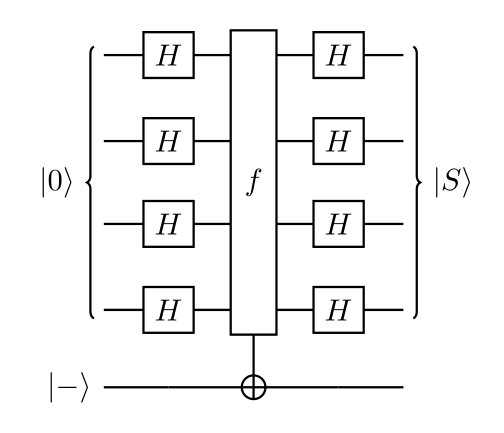

Para explicar el algoritmo, veamos más de cerca lo que sucede cuando aplicamos una compuerta $H$ a cada qubit. Si tenemos un estado de $n$-qubits, $|a\rangle$, y aplicamos las compuertas $H$, veremos la transformación:

$$
|a\rangle \xrightarrow{H^{\otimes n}} \frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} (-1)^ {a\cdot x}|x\rangle.
$$

# **Explicación matemática**

Recordamos que la compuerta Hadamard realiza las siguientes transformaciones en un qubit:

$$ H|0\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) $$
$$ H|1\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle) $$

Usando la notación de suma, podríamos reescribirlo así:

$$ H|a\rangle = \frac{1}{\sqrt{2}}\sum_{x\in \{0,1\}} (-1)^{a\cdot x}|x\rangle. $$

En el caso de dos qubits, se aplica una Hadamard a cada uno, lo que realiza las siguientes transformaciones:

$$ H^{\otimes 2}|00\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle) $$
$$ H^{\otimes 2}|01\rangle = \tfrac{1}{2}(|00\rangle - |01\rangle + |10\rangle - |11\rangle) $$
$$ H^{\otimes 2}|10\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle - |10\rangle - |11\rangle) $$
$$ H^{\otimes 2}|11\rangle = \tfrac{1}{2}(|00\rangle - |01\rangle - |10\rangle + |11\rangle) $$

Podemos expresar esto usando la siguiente suma:

$$ H^{\otimes 2}|a\rangle = \frac{1}{2}\sum_{x\in \{0,1\}^2} (-1)^{a\cdot x}| x\rangle $$

<br><br>

En particular, cuando comenzamos con un registro cuántico $|00\dots 0\rangle$ y le aplicamos $n$ compuertas Hadamard, tenemos la siguiente superposición cuántica:

$$
|00\dots 0\rangle \xrightarrow{H^{\otimes n}} \frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} |x \rangle
$$

En este caso, el término de fase $(-1)^{a\cdot x}$ desaparece, ya que $a=0$, y por lo tanto $(-1)^{a\cdot x} = 1$.

El oráculo clásico $f_s$ devuelve $1$ para cualquier entrada $x$ tal que $s \cdot x\mod 2 = 1$, y devuelve $0$ en caso contrario. Si utilizamos el mismo truco de retroceso de fase del algoritmo de Deutsch-Jozsa y actuamos sobre un qubit en el estado $|{-}\rangle$, obtenemos la siguiente transformación:

$$
|x \rangle \xrightarrow{f_s} (-1)^{s\cdot x} |x \rangle
$$

El algoritmo para revelar la cadena de bits oculta se sigue naturalmente al consultar el oráculo cuántico $f_s$ con la superposición cuántica obtenida de la transformación de Hadamard de $|00\dots 0\rangle$. A saber,

$$
|00\dots 0\rangle \xrightarrow{H^{\otimes n}} \frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} |x \rangle \xrightarrow{f_a} \frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} (-1)^{a\cdot x}|x \rangle
$$

Debido a que la inversa de las $n$ compuertas Hadamard son nuevamente las $n$ compuertas Hadamard, podemos obtener $a$ mediante

$$
\frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} (-1)^{a\cdot x}|x\rangle \xrightarrow{H^ {\otimes n}} |a\rangle
$$

# **Ejemplo:**
    
Para $n=2$ qubits y una cadena secreta $s=11$. Ten en cuenta que estamos siguiendo la formulación de la Referencia [J. Du, et.al.](https://arxiv.org/abs/quant-ph/0012114) que genera un circuito para el oráculo cuántico de Bernstein-Vazirani utilizando un solo registro.

**1.** El registro de dos qubits se inicializa a cero:
    
$$\lvert \psi_0 \rangle = \lvert 0 0 \rangle$$

**2.** Se aplica la compuerta Hadamard a $\vert\psi_{0}\rangle$:

\begin{align}
\vert\psi_{1}\rangle & =H^{\otimes 2}\vert\psi_{0}\rangle = H\vert 0\rangle\otimes H\vert 0\rangle\\\\
                     & = \left(\frac{\vert 0\rangle +\vert 1\rangle}{\sqrt{2}}\right)\left(\frac{\vert 0\rangle +\vert 1\rangle}{\sqrt{2}}\right)\\\\
                     & =\frac{1}{2} \left( \lvert 0 0 \rangle + \lvert 0 1 \rangle + \lvert 1 0 \rangle + \lvert 1 1 \rangle \right)
\end{align}

**3.** Para la cadena $s=11$, el oráculo cuántico realiza la operación:

$$
|x \rangle \xrightarrow{f_s} (-1)^{x\cdot 11} |x \rangle
$$

$$\lvert \psi_2 \rangle = \frac{1}{2} \left( (-1)^{00\cdot 11}|00\rangle + (-1)^{01\cdot 11}|01\rangle + (-1)^{10\cdot 11}|10\rangle + (-1)^{11\cdot 11}|11\rangle \right)$$

$$\lvert \psi_2 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle - \lvert 0 1 \rangle - \lvert 1 0 \rangle + \lvert 1 1 \rangle \right) $$

**4.** Aplicar la compuerta Hadamard a $\vert\psi_{2}\rangle$:

\begin{align}
\lvert \psi_3 \rangle & = H^{\otimes 2}\vert\psi_{2}\rangle\\\\
                      & = \lvert 1 1 \rangle
\end{align}    

**5.** Medir para encontrar la cadena secreta $s=11$

# **Implementación en Qiskit**

In [ ]:
# importaciones
import matplotlib.pyplot as plt
import numpy as np

from qiskit_aer import AerSimulator # Simulador
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Operator, Statevector
from qiskit.visualization import plot_histogram

Ahora veremos la implementación del **algoritmo Bernstein-Vazirani en Qiskit** para una función de tres bits con $s=011$.

Primero establecemos el número de qubits utilizados en el experimento y la cadena de bits oculta $s$ que el algoritmo encontrará. La cadena de bits oculta $s$ determina el circuito del oráculo cuántico.

In [ ]:
n = 3       # número de qubits utilizados para representar s
s = '011'   # la cadena binaria oculta

**1.** Necesitamos un circuito con $n$ qubits, más un qubit auxiliar, el cual deberemos colocar en el estado $\vert -\rangle$

**2.** Aplicaremos compuertas **Hadamard** antes de consultar al oráculo

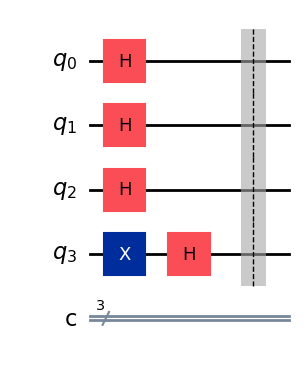

In [ ]:
# Necesitamos un circuito con n qubits, más un qubit auxiliar
bv_circuit = QuantumCircuit(n+1,n)

# colocar el qubit auxiliar en el estado |->
bv_circuit.x(n)
bv_circuit.h(n)

# Aplicar compuertas Hadamard antes de consultar al oráculo
for i in range (n):
  bv_circuit.h(i)


# Aplicar una barrera
bv_circuit.barrier()

# Dibujar circuito
bv_circuit.draw('mpl')

In [ ]:
#Statevector(bv_circuit).draw('latex', max_size=16)

**3.** Creamos y aplicamos el **oráculo**

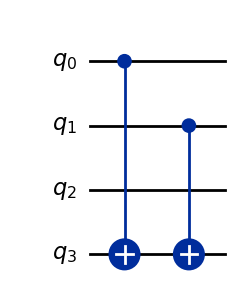

In [ ]:
# Necesitamos un circuito con n qubits, más un qubit auxiliar
U_f_circuit = QuantumCircuit(n+1)

# Oráculo: aplicar CNOT donde s[i] == '1'
s = s[::-1]  # Invertir s por el orden de los qubits en Qiskit
for q in range(n):
    if s[q] == '1':
        U_f_circuit.cx(q, n)

# Dibujar circuito
U_f_circuit.draw('mpl')

la operacion matemática a realizar es $U_{f}\left(H^{\otimes 3}\vert a\rangle\right)$

**4.** Aplicaremos compuertas **Hadamard** después de consultar al oráculo

**5.** Usaremos $n$ **bits clásicos** para escribir la **salida** para realizar **mediciones**

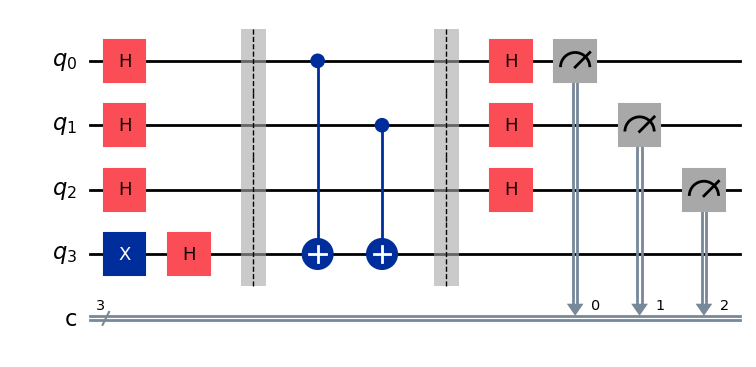

In [ ]:
# Aplicar oráculo
BV_circuit = bv_circuit.compose(U_f_circuit)
BV_circuit.barrier()

# Aplicar Hadamard después del oráculo
for i in range (n):
  BV_circuit.h(i)

# Medir los n qubits en los n bits clásicos
for i in range (n):
  BV_circuit.measure(i,i)

# Agregar mediciones en los primeros n qubits


BV_circuit.draw('mpl')

In [ ]:
#Statevector(BV_circuit).draw('latex', max_size=16)

**6.** Dibujar el histograma

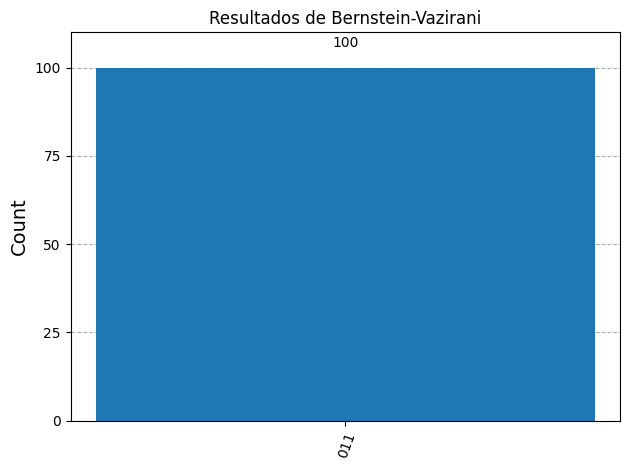

In [ ]:
# Número de shots (veces que se ejecuta el circuito)
shots = 100

# Crear el simulador
simulator = AerSimulator()

# Transpilar el circuito para optimizarlo en el simulador
compiled_circuit = transpile(BV_circuit, simulator)

# Ejecutar el circuito en el simulador
job = simulator.run(compiled_circuit, shots=shots)

# Obtener resultados
result = job.result()
counts = result.get_counts()

# Dibujar histograma
plot_histogram(counts, title="Resultados de Bernstein-Vazirani")


**Podemos ver que el resultado de la medición es la cadena oculta** `011`.

# **Generalización**

In [ ]:
def bernstein_vazirani(n, s, shots=8092):
    """
    Implementa y ejecuta el algoritmo de Bernstein-Vazirani para un número arbitrario de qubits n
    y una cadena secreta s de longitud n.
    """
    assert len(s) == n, "La longitud de s debe coincidir con n"

    # Crear el circuito con (n qubits + 1 auxiliar) y n bits clásicos
    bv_circuit = QuantumCircuit(n+1, n)

    # Inicializar el qubit auxiliar en |->
    bv_circuit.x(n)
    bv_circuit.h(n)

    # Aplicar Hadamard a los primeros n qubits
    bv_circuit.h(range(n))
    bv_circuit.barrier()

    # Aplicar el oráculo: CNOT donde s[i] == '1'
    s_invertida = s[::-1]  # Invertir s por el orden de los qubits en Qiskit
    for q in range(n):
        if s_invertida[q] == '1':
            bv_circuit.cx(q, n)

    bv_circuit.barrier()

    # Aplicar Hadamard nuevamente a los primeros n qubits
    bv_circuit.h(range(n))

    # Medir los n qubits en los n bits clásicos
    bv_circuit.measure(range(n), range(n))

    return bv_circuit


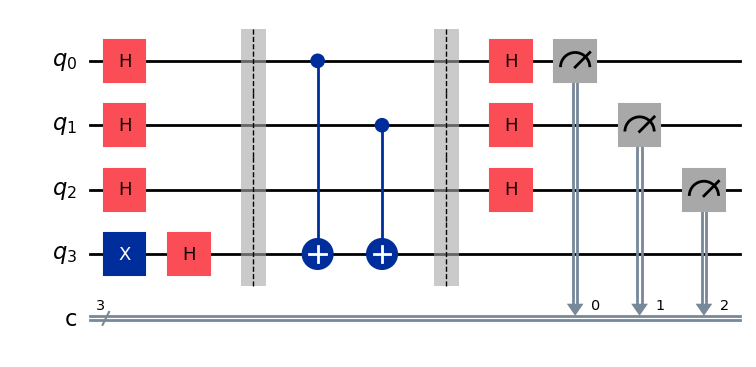

In [ ]:
# --- Ejecución para diferentes casos ---

# Caso 1: n = 3, s = "011"

circuito_3 = bernstein_vazirani(n=3, s="011")
circuito_3.draw('mpl')  # Dibuja el circuito (se mostrará en la salida)

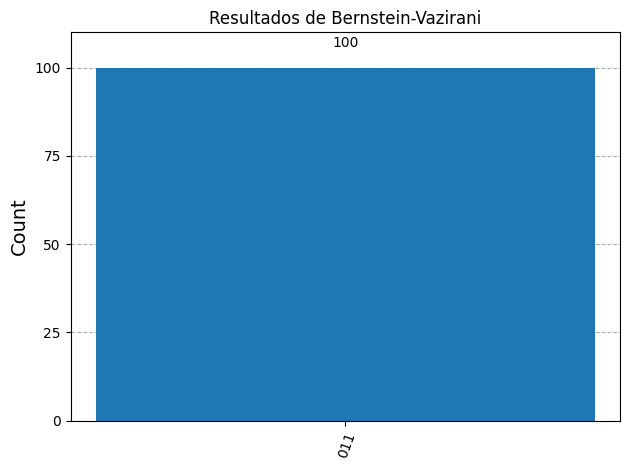

In [ ]:
# Número de shots (veces que se ejecuta el circuito)
shots = 100

# Crear el simulador
simulator = AerSimulator()

# Transpilar el circuito para optimizarlo en el simulador
compiled_circuit = transpile(circuito_3, simulator)

# Ejecutar el circuito en el simulador
job = simulator.run(compiled_circuit, shots=shots)

# Obtener resultados
result = job.result()
counts = result.get_counts()

# Dibujar histograma
plot_histogram(counts, title="Resultados de Bernstein-Vazirani")

## **Ejemplo:**

 Modifique la implementación para una cadena secreta $s=1011$.

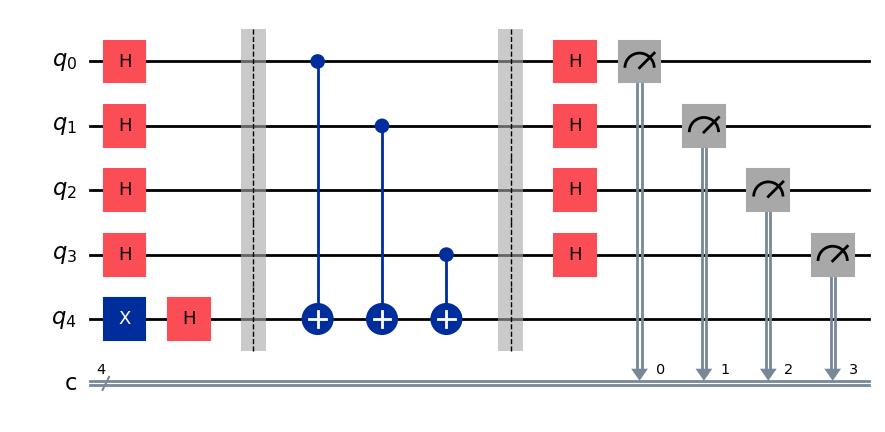

In [ ]:
# Caso 2: n = 4, s = "1011"
circuito_4 = bernstein_vazirani(n=4, s="1011")
circuito_4.draw('mpl')  # Dibuja el circuito (se mostrará en la salida)

## **Ejercicio:**

Realiza las sguientes mediciones

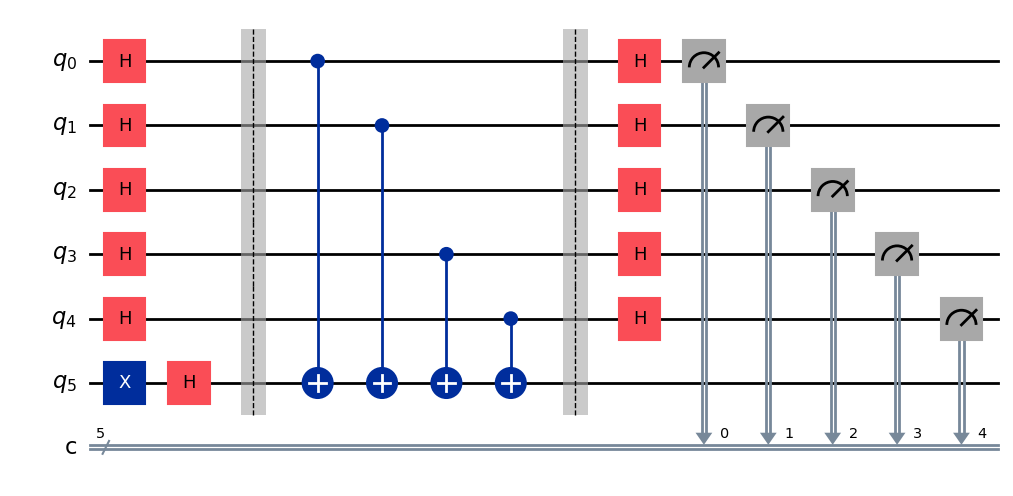

In [ ]:
# Caso 3: n = 5, s = "11001"
circuito_5 = bernstein_vazirani(n=5, s="11011")
circuito_5.draw('mpl')  # Dibuja el circuito (se mostrará en la salida)

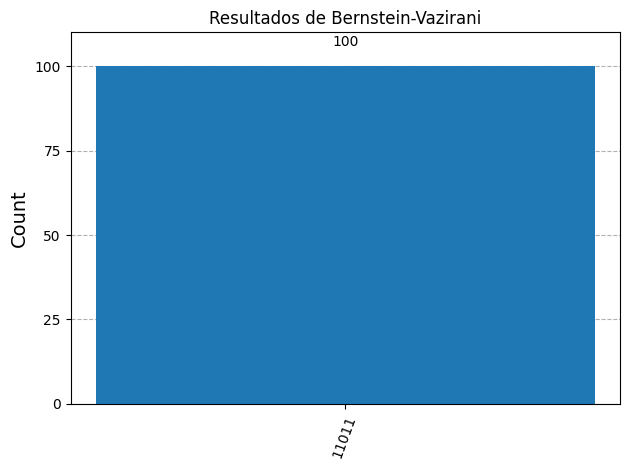

In [ ]:
# Número de shots (veces que se ejecuta el circuito)
shots = 100

# Crear el simulador
simulator = AerSimulator()

# Transpilar el circuito para optimizarlo en el simulador
compiled_circuit = transpile(circuito_5, simulator)

# Ejecutar el circuito en el simulador
job = simulator.run(compiled_circuit, shots=shots)

# Obtener resultados
result = job.result()
counts = result.get_counts()

# Dibujar histograma
plot_histogram(counts, title="Resultados de Bernstein-Vazirani")

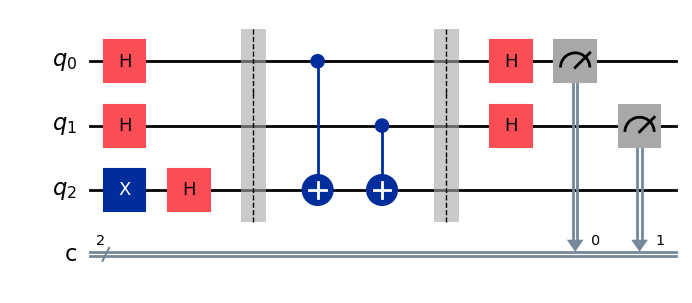

In [ ]:
# Caso 4: n = 2, s = "11"
circuito_6 = bernstein_vazirani(n=2, s="11")
circuito_6.draw('mpl')  # Dibuja el circuito (se mostrará en la salida)

## **Ejemplo:**

En caso de cifrar el **mensaje** (la cadena de bits) podemos aplicar el **algoritmo de Bernstein-Vazirani** de la siguiente forma

Secreto oculto (usado solo para verificar): 1111


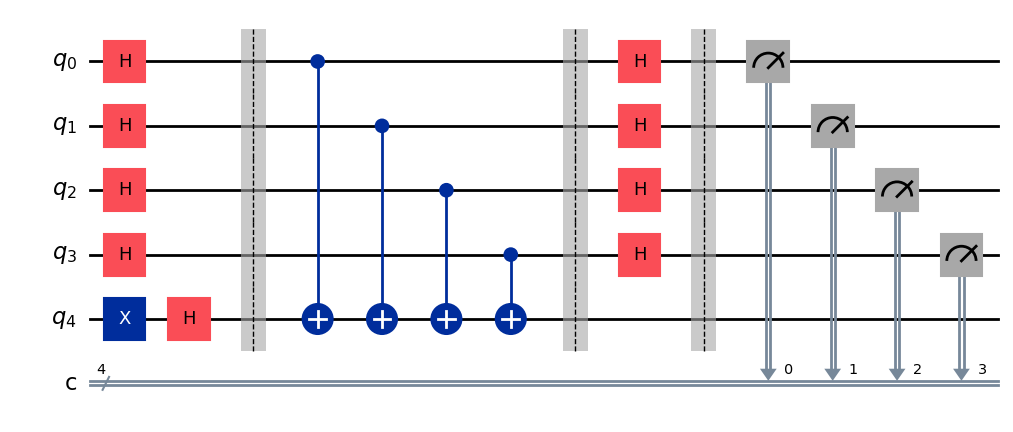

In [ ]:
import random

# Número de qubits
n = 4

# Secreto s (oculto al usuario del algoritmo)
s = ''.join(random.choice(['0', '1']) for _ in range(n))
print(f"Secreto oculto (usado solo para verificar): {s}")

# Creamos el oráculo para f_s(x) = s · x mod 2
def bernstein_vazirani_oracle(s):
    oracle = QuantumCircuit(n+1)
    for i, bit in enumerate(s):
        if bit == '1':
            oracle.cx(i, n)  # CNOT de x_i a qubit auxiliar
    return oracle

# Creamos el circuito completo
bv = QuantumCircuit(n+1, n)

# Paso 1: Inicializamos el último qubit en |-> (estado auxiliar)
bv.x(n)
bv.h(n)

# Paso 2: Aplicamos Hadamards a los qubits de entrada
bv.h(range(n))

bv.barrier()

# Paso 3: Aplicamos el oráculo oculto
oracle = bernstein_vazirani_oracle(s)
bv.compose(oracle, inplace=True)

bv.barrier()

# Paso 4: Aplicamos Hadamards de nuevo a los qubits de entrada
bv.h(range(n))

bv.barrier()

# Paso 5: Medimos los primeros n qubits
bv.measure(range(n), range(n))

# Dibujamos el circuito (opcional)
bv.draw('mpl')

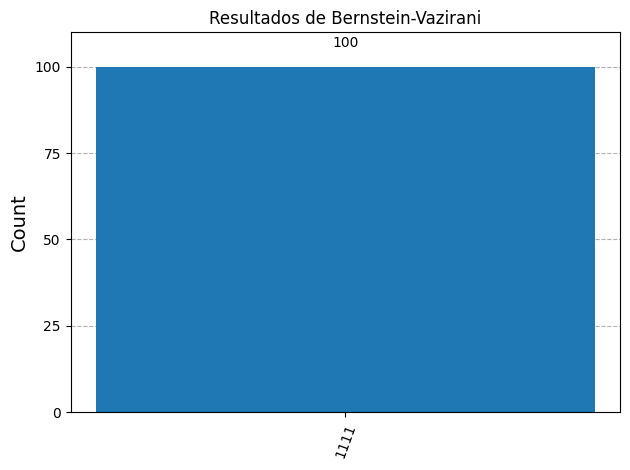

In [ ]:
# Número de shots (veces que se ejecuta el circuito)
shots = 100

# Crear el simulador
simulator = AerSimulator()

# Transpilar el circuito para optimizarlo en el simulador
compiled_circuit = transpile(bv, simulator)

# Ejecutar el circuito en el simulador
job = simulator.run(compiled_circuit, shots=shots)

# Obtener resultados
result = job.result()
counts = result.get_counts()

# Dibujar histograma
plot_histogram(counts, title="Resultados de Bernstein-Vazirani")